In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%reload_ext autoreload
%autoreload 2
from HelperFunctions import dummify_columns, undummify, feature_standardize, label_encode_column, remove_outliers

In [2]:
df=pd.read_csv('down_sampled_df.csv',index_col='id')

In [3]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65251140,25000.0,36,7.89,A,A5,< 1 year,MORTGAGE,94000.0,Source Verified,2015-11-01,Fully Paid,debt_consolidation,933xx,CA,19.36,0.0,1997-09-01,25.0,-999.0,0.0,57.1,30.0,w,0.0,-999.0,Individual,0.0,121.0,-999.0,-999.0,36500.0,-999.0,0.0,0.0,4.0,0.0,0.0,1.0,96.7,0.0,0.0,239880.0,58955.0,702.0,131064.0,0.633333,0.266667,0.100000,0.578947,0.363636,0.368421,-999.0,0.578947,0.500000,34.500000,28136.954317,0.220221
62519711,14000.0,36,6.89,A,A3,3 years,RENT,45000.0,Not Verified,2015-10-01,Fully Paid,credit_card,288xx,NC,8.45,0.0,1988-12-01,-999.0,-999.0,0.0,23.5,9.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60900.0,-999.0,0.0,0.0,34.0,0.0,0.0,0.0,100.0,0.0,0.0,60900.0,0.0,777.0,0.0,0.777778,0.000000,0.222222,0.857143,0.500000,0.428571,-999.0,0.428571,0.333333,37.566667,15571.536315,0.008344
50646937,5000.0,36,5.32,A,A1,5 years,MORTGAGE,80000.0,Not Verified,2015-05-01,Fully Paid,debt_consolidation,483xx,MI,10.67,0.0,2008-02-01,-999.0,-999.0,0.0,21.9,32.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,72900.0,-999.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,207312.0,29912.0,727.0,98602.0,0.625000,0.343750,0.031250,0.650000,0.538462,0.450000,-999.0,0.750000,0.656250,34.500000,5417.327585,0.412407
16442318,6500.0,36,7.69,A,A4,7 years,MORTGAGE,61000.0,Not Verified,2014-05-01,Fully Paid,debt_consolidation,985xx,WA,13.93,0.0,2002-10-01,68.0,-999.0,0.0,33.6,15.0,w,0.0,68.0,Individual,0.0,1101.0,-999.0,-999.0,4200.0,-999.0,0.0,0.0,13.0,4.0,0.0,0.0,73.3,0.0,0.0,217544.0,27075.0,662.0,178608.0,0.400000,0.466667,0.133333,0.500000,0.666667,0.500000,-999.0,0.666667,0.600000,36.533333,7299.283210,0.562369
49924755,16000.0,36,5.32,A,A1,10+ years,MORTGAGE,98000.0,Source Verified,2015-06-01,Fully Paid,credit_card,305xx,GA,4.69,1.0,1993-04-01,18.0,-999.0,0.0,27.7,42.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60100.0,-999.0,0.0,0.0,10.0,0.0,0.0,4.0,97.6,0.0,0.0,254900.0,0.0,747.0,179982.0,0.714286,0.142857,0.119048,0.533333,0.187500,0.166667,-999.0,0.433333,0.333333,36.533333,17336.643738,0.941376


# Converting earliest credit into numeric, referencing issue_d

In [4]:
df.earliest_cr_line=pd.to_datetime(df.earliest_cr_line)
df.issue_d=pd.to_datetime(df.issue_d)
df.earliest_cr_line=df.issue_d-df.earliest_cr_line

In [5]:
df.earliest_cr_line=df.earliest_cr_line.astype('str')
df.earliest_cr_line=df.earliest_cr_line.str.extract('(\d+)')
df.earliest_cr_line=df.earliest_cr_line.astype('int')
df.loc[:,'earliest_cr_line']=df.earliest_cr_line/30/12
df=df.rename(columns={'earliest_cr_line':'credit_age_years'})

In [6]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,credit_age_years,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65251140,25000.0,36,7.89,A,A5,< 1 year,MORTGAGE,94000.0,Source Verified,2015-11-01,Fully Paid,debt_consolidation,933xx,CA,19.36,0.0,18.430556,25.0,-999.0,0.0,57.1,30.0,w,0.0,-999.0,Individual,0.0,121.0,-999.0,-999.0,36500.0,-999.0,0.0,0.0,4.0,0.0,0.0,1.0,96.7,0.0,0.0,239880.0,58955.0,702.0,131064.0,0.633333,0.266667,0.100000,0.578947,0.363636,0.368421,-999.0,0.578947,0.500000,34.500000,28136.954317,0.220221
62519711,14000.0,36,6.89,A,A3,3 years,RENT,45000.0,Not Verified,2015-10-01,Fully Paid,credit_card,288xx,NC,8.45,0.0,27.222222,-999.0,-999.0,0.0,23.5,9.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60900.0,-999.0,0.0,0.0,34.0,0.0,0.0,0.0,100.0,0.0,0.0,60900.0,0.0,777.0,0.0,0.777778,0.000000,0.222222,0.857143,0.500000,0.428571,-999.0,0.428571,0.333333,37.566667,15571.536315,0.008344
50646937,5000.0,36,5.32,A,A1,5 years,MORTGAGE,80000.0,Not Verified,2015-05-01,Fully Paid,debt_consolidation,483xx,MI,10.67,0.0,7.350000,-999.0,-999.0,0.0,21.9,32.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,72900.0,-999.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,207312.0,29912.0,727.0,98602.0,0.625000,0.343750,0.031250,0.650000,0.538462,0.450000,-999.0,0.750000,0.656250,34.500000,5417.327585,0.412407
16442318,6500.0,36,7.69,A,A4,7 years,MORTGAGE,61000.0,Not Verified,2014-05-01,Fully Paid,debt_consolidation,985xx,WA,13.93,0.0,11.750000,68.0,-999.0,0.0,33.6,15.0,w,0.0,68.0,Individual,0.0,1101.0,-999.0,-999.0,4200.0,-999.0,0.0,0.0,13.0,4.0,0.0,0.0,73.3,0.0,0.0,217544.0,27075.0,662.0,178608.0,0.400000,0.466667,0.133333,0.500000,0.666667,0.500000,-999.0,0.666667,0.600000,36.533333,7299.283210,0.562369
49924755,16000.0,36,5.32,A,A1,10+ years,MORTGAGE,98000.0,Source Verified,2015-06-01,Fully Paid,credit_card,305xx,GA,4.69,1.0,22.488889,18.0,-999.0,0.0,27.7,42.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60100.0,-999.0,0.0,0.0,10.0,0.0,0.0,4.0,97.6,0.0,0.0,254900.0,0.0,747.0,179982.0,0.714286,0.142857,0.119048,0.533333,0.187500,0.166667,-999.0,0.433333,0.333333,36.533333,17336.643738,0.941376


# Converting employment length into numeric 

In [7]:
df.loc[:,'emp_length']=df.loc[:,'emp_length'].str.extract('(\d)').values

In [8]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,credit_age_years,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
65251140,25000.0,36,7.89,A,A5,1,MORTGAGE,94000.0,Source Verified,2015-11-01,Fully Paid,debt_consolidation,933xx,CA,19.36,0.0,18.430556,25.0,-999.0,0.0,57.1,30.0,w,0.0,-999.0,Individual,0.0,121.0,-999.0,-999.0,36500.0,-999.0,0.0,0.0,4.0,0.0,0.0,1.0,96.7,0.0,0.0,239880.0,58955.0,702.0,131064.0,0.633333,0.266667,0.100000,0.578947,0.363636,0.368421,-999.0,0.578947,0.500000,34.500000,28136.954317,0.220221
62519711,14000.0,36,6.89,A,A3,3,RENT,45000.0,Not Verified,2015-10-01,Fully Paid,credit_card,288xx,NC,8.45,0.0,27.222222,-999.0,-999.0,0.0,23.5,9.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60900.0,-999.0,0.0,0.0,34.0,0.0,0.0,0.0,100.0,0.0,0.0,60900.0,0.0,777.0,0.0,0.777778,0.000000,0.222222,0.857143,0.500000,0.428571,-999.0,0.428571,0.333333,37.566667,15571.536315,0.008344
50646937,5000.0,36,5.32,A,A1,5,MORTGAGE,80000.0,Not Verified,2015-05-01,Fully Paid,debt_consolidation,483xx,MI,10.67,0.0,7.350000,-999.0,-999.0,0.0,21.9,32.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,72900.0,-999.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,207312.0,29912.0,727.0,98602.0,0.625000,0.343750,0.031250,0.650000,0.538462,0.450000,-999.0,0.750000,0.656250,34.500000,5417.327585,0.412407
16442318,6500.0,36,7.69,A,A4,7,MORTGAGE,61000.0,Not Verified,2014-05-01,Fully Paid,debt_consolidation,985xx,WA,13.93,0.0,11.750000,68.0,-999.0,0.0,33.6,15.0,w,0.0,68.0,Individual,0.0,1101.0,-999.0,-999.0,4200.0,-999.0,0.0,0.0,13.0,4.0,0.0,0.0,73.3,0.0,0.0,217544.0,27075.0,662.0,178608.0,0.400000,0.466667,0.133333,0.500000,0.666667,0.500000,-999.0,0.666667,0.600000,36.533333,7299.283210,0.562369
49924755,16000.0,36,5.32,A,A1,1,MORTGAGE,98000.0,Source Verified,2015-06-01,Fully Paid,credit_card,305xx,GA,4.69,1.0,22.488889,18.0,-999.0,0.0,27.7,42.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60100.0,-999.0,0.0,0.0,10.0,0.0,0.0,4.0,97.6,0.0,0.0,254900.0,0.0,747.0,179982.0,0.714286,0.142857,0.119048,0.533333,0.187500,0.166667,-999.0,0.433333,0.333333,36.533333,17336.643738,0.941376


# Converting profit into annualized return
#### Profit = total_payment - recovery_collection_fee = payout
#### payout/funded_amnt = (1+r)^((loan duration+1)/12)
#### loan duration in the dataframe is in terms of months
#### Note that we added one month to loan duration because some pay out in the same month! if we don't +1 we will get infinite for return_rate

In [9]:
df.profit=(df.profit/df.funded_amnt)**(12/(df.loan_duration+1))-1

In [10]:
# df.profit=np.exp((np.log(df.profit/df.funded_amnt))*12/(df.loan_duration+1))-1

In [11]:
df=df.rename(columns={'profit':'return_rate'})

# Remove Outliers

In [12]:
df.shape

(53406, 57)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 45 Text xticklabel objects>)

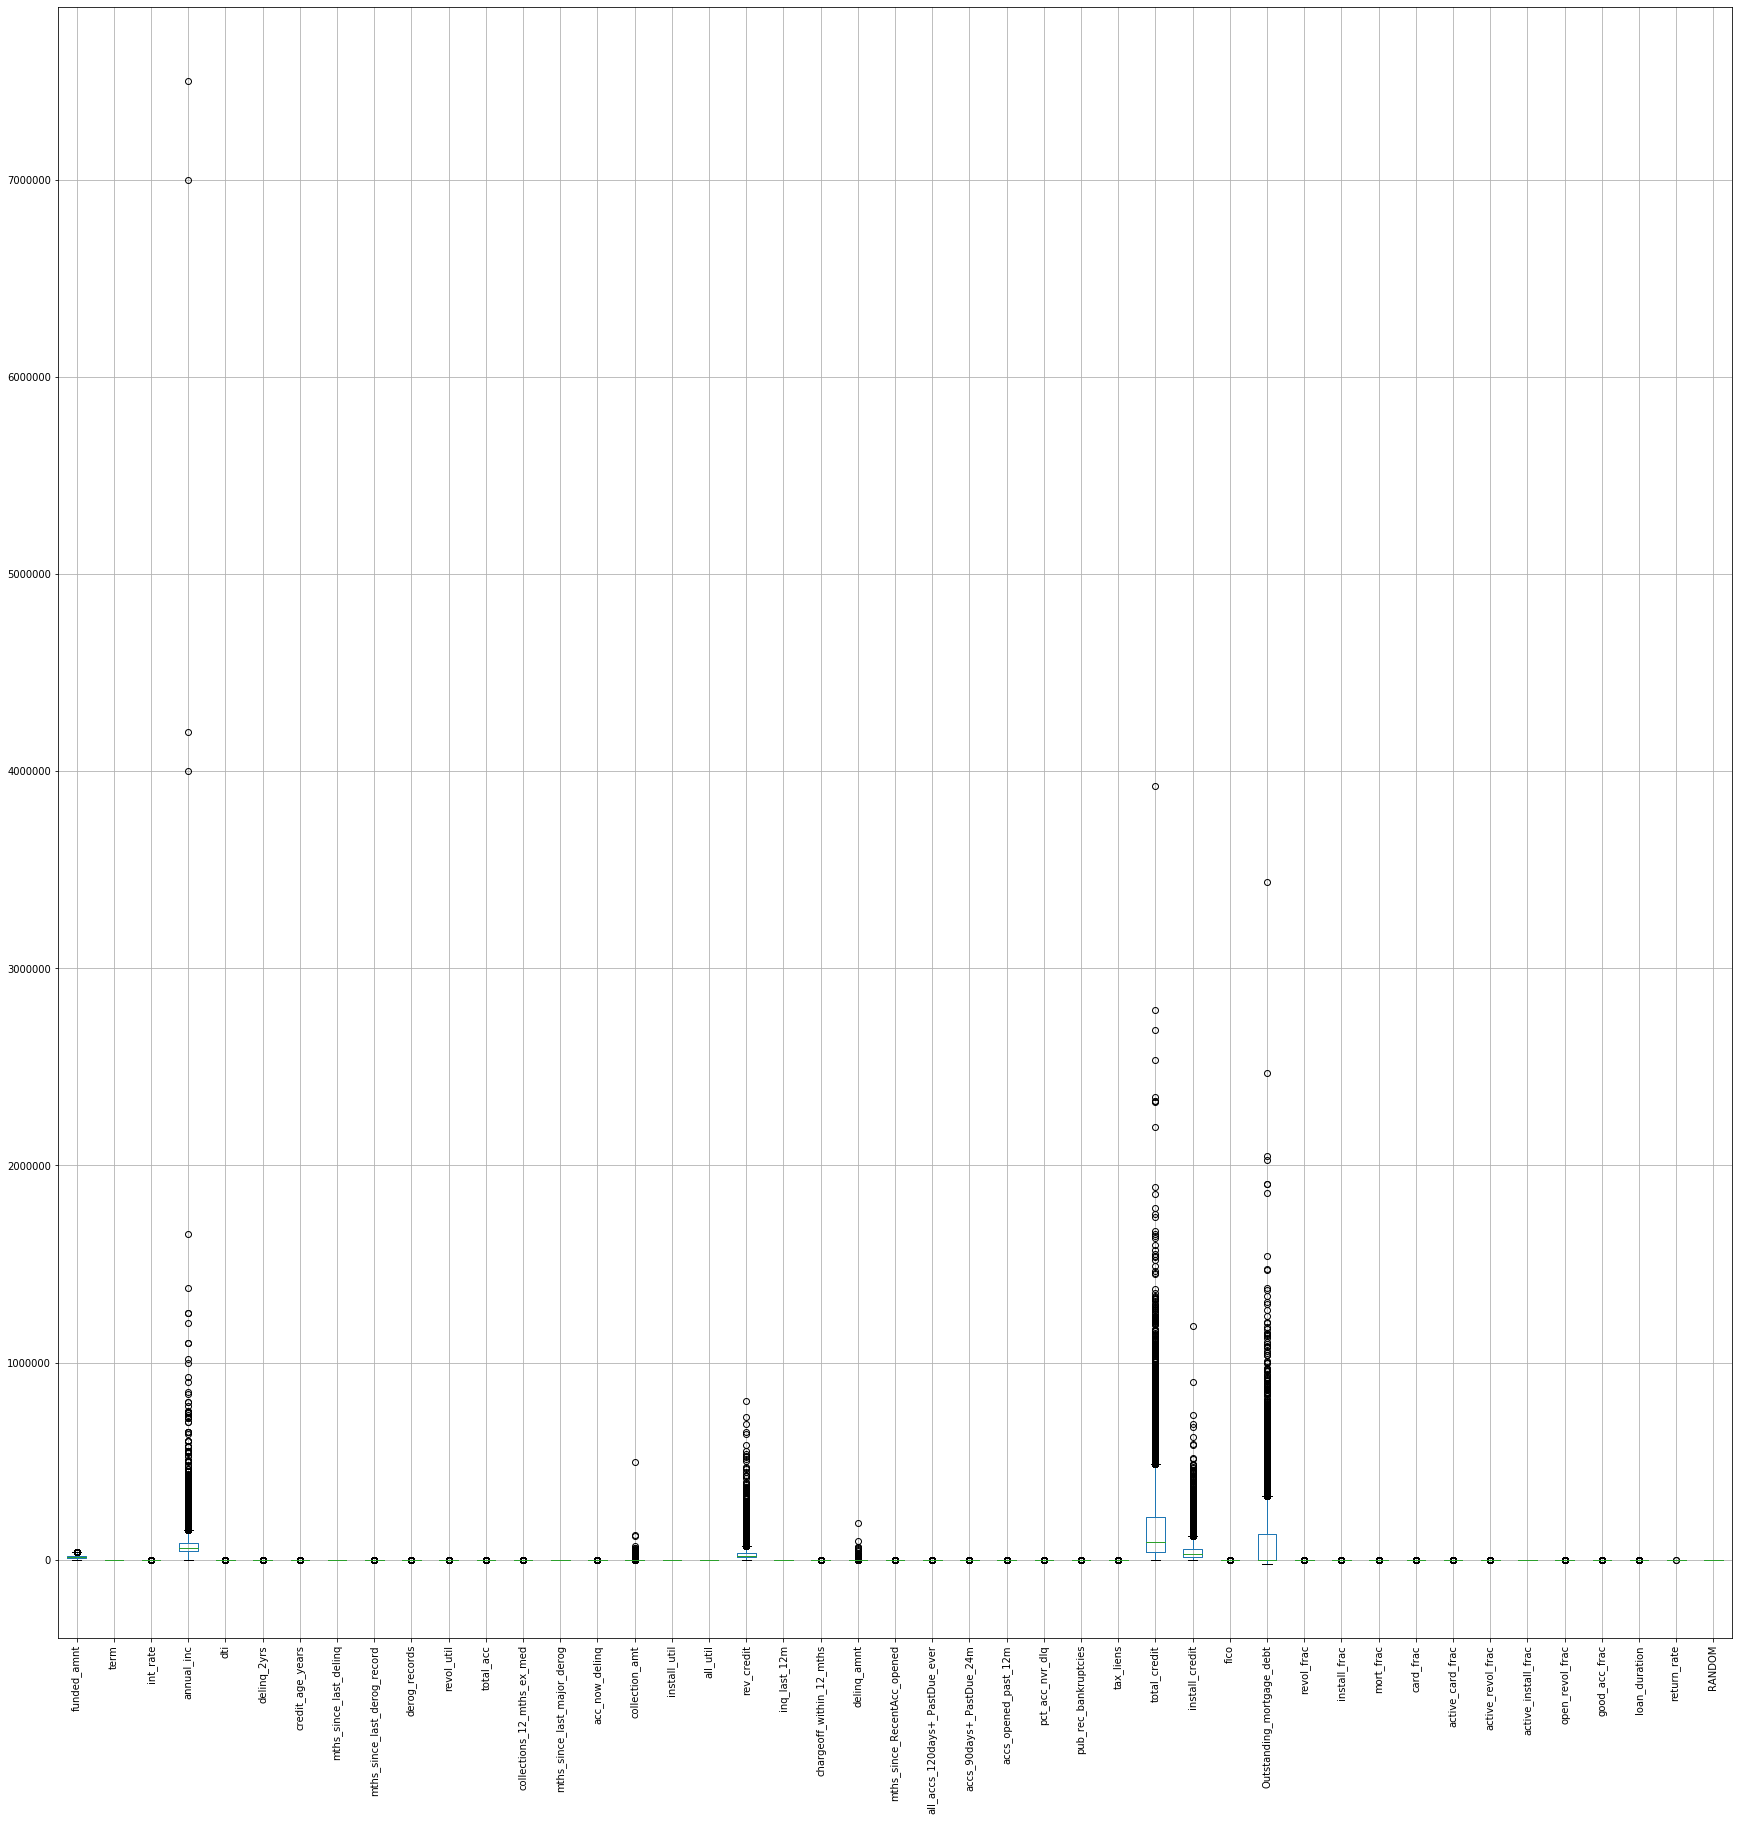

In [13]:
plt.figure(figsize=(30,30))
df.boxplot()
plt.xticks(rotation=90)

In [14]:
# standarddeviation=np.std(df.loc[df.loc[:,'annual_inc']!=-999,'annual_inc'])
# df=dataframe.loc[abs(dataframe.loc[:,col])<standarddeviation*threshold,:]

In [15]:
#### the variables used important for outliers:
#### annual income, collection_amt, rev_credit, total_credit,install_credit,outstanding_mortgage_debt
outlier_gone_df=remove_outliers(df,'annual_inc',threshold=5)
outlier_gone_df=remove_outliers(outlier_gone_df,'collection_amt',threshold=5)
outlier_gone_df=remove_outliers(outlier_gone_df,'rev_credit',threshold=5)
outlier_gone_df=remove_outliers(outlier_gone_df,'total_credit',threshold=5)
outlier_gone_df=remove_outliers(outlier_gone_df,'install_credit',threshold=5)
outlier_gone_df=remove_outliers(outlier_gone_df,'Outstanding_mortgage_debt',threshold=5)

In [16]:
outlier_gone_df.shape

(51872, 57)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 45 Text xticklabel objects>)

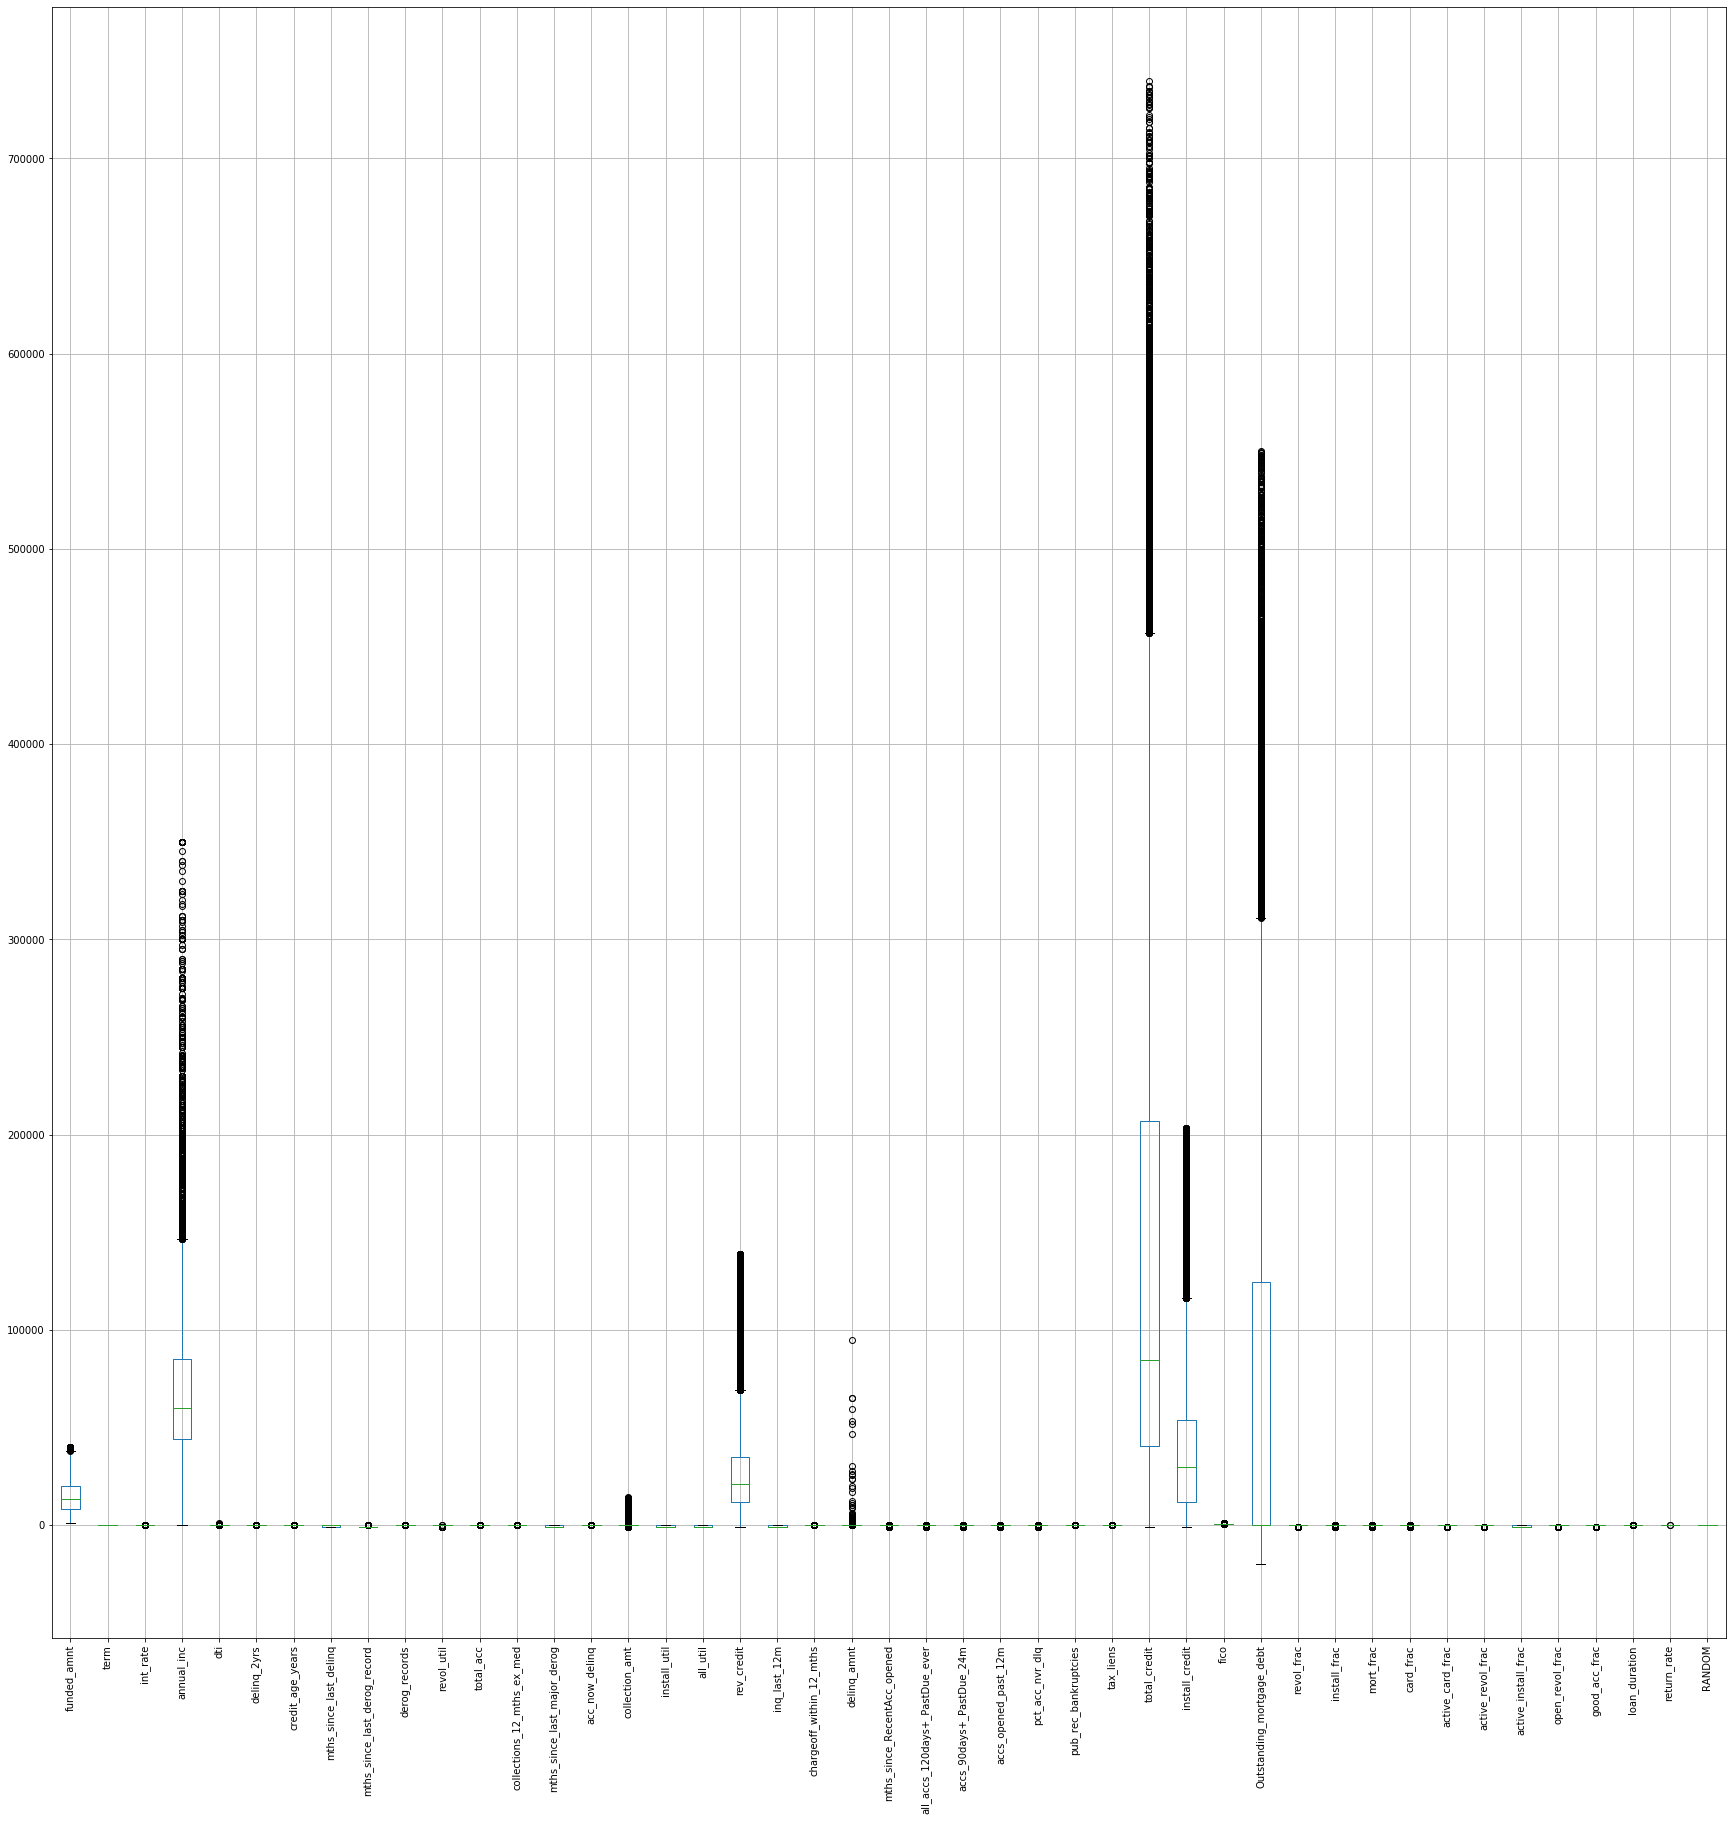

In [17]:
plt.figure(figsize=(30,30))
outlier_gone_df.boxplot()
plt.xticks(rotation=90)

In [18]:
outlier_gone_df.to_csv('down_sampled_df_v2.csv')

In [19]:
df[df.isnull().any(axis=1)]

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,credit_age_years,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,return_rate,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
